Un concensionario nos ha llamado para crear un registro de sus ventas, empezaremos creando una manera de llevar el inventario de las motos que hay. Crea una clase llamada motocicleta que tenga lo siguiente:
- matricula
- número de ruedas (podría ser un triciclo)
- marca
- color
- tanque (lleno, medio, vacío)


Cuando un valor pueda ser predefinido haz que sea el valor predeterminado

In [5]:
#Ejercicio 1
class moto:
    def __init__(self,matricula,marca,color, tanque= "lleno",ruedas = 2):
        self.matricula = matricula
        self.ruedas = ruedas
        self.color = color
        self.marca = marca
        if tanque in ["lleno", "medio","vacio"]:
            self.tanque = tanque
        else: 
            raise Exception("Valor no válido")
            #Ejercicio 2
    def arrancar(self):
            if self.tanque == "medio":
                print("Brum brum")
                self.tanque = "vacio"
            
            elif self.tanque == "lleno": 
                print("Brum brum")
                self.tanque = "medio"
    def repostar(self):
        self.tanque = "lleno"
        return
            
        
        
        
moto1 = moto("123","toyota","verde")


In [63]:
moto1.tanque
moto1.arrancar()

Brum brum


Podría ser que algún cliente quiera probar una de las motos, crea un método que sea arrancar y, si tiene gasolina la moto, de una muestra que esta encendida, pero al ser probada debera pasar a tener menos gasolina, es decir, si esta llena pasa a medio y medio a vacia. 
De aqui podemos deducir que podría ser necesario repostar las motos, crea este metodo que nos rellene cualquier tanque al tope

# Grupo de las matrices

Definiremos ahora de forma mas o menos formal el grupo de las matrices de orden 2 con determinante no nulo, empezaremos creando la clase, esto será una clase que reciba 4 elementos a,b,c,d  que son los cuatro componente de nuestra matriz

In [8]:
class matriz2:
    def __init__(self,a,b,c,d):
        if a*d -c*b !=0:
            self.a=a
            self.b=b
            self.c=c
            self.d=d
        else: 
            raise Exception("Elementos no válidos")
    def __str__(self):
        return "("+str(self.a)+str(self.b)+")"+"\n"+"("+str(self.c)+str(self.d)+")"
    def __repr__(self):
        return str(self)
    def __add__(self,m2):
        return matriz2(self.a+m2.a,self.b+m2.b,self.c+m2.c,self.d+m2.d)
    
    

In [10]:
M1 =matriz2(1,2,1,1)
M2 = matriz2(1,2,3,4)
print(M1)
M1

(12)
(11)


(12)
(11)

In [6]:
str(M1)

'1 \n2 '

In [138]:
M1+M2

(24)
(45)

Ahora tenemos que hacer que las matrices se puedan ver de forma comoda usa el metodo magico "__str__" para que se muestre la matriz de forma cuadrada

Como habreis visto aun usando el metodo __str__ sigue sin verse, esto es porque ese metodo solo funcion cuando le digamos que la matriz es un string, pero no se lo hemos dicho, para arreglar esto usaremos el metodo __repr__

Ya puedo representarlas de forma comoda veamos que ocurre con la suma

A partir de ahora, crea los metodos para multiplicar matrices, hallar sus inversas y sus traspuestas. Puede que mas adelante retomemos este ejercicio con otro tipo de matrices...

# Árboles Binarios - Recursión

Los árboles binarios son un tipo de representación de datos que en cada nodo puede tener o bien 2 o bien 0 hijos, por simplicidad consideremos los árboles que en cada nodo pueden tener cualquier tipo de valor (¿cómo se haría si no fuese válido cualquier valor?) y realizaremos la representación mediante recursión de la siguiente forma 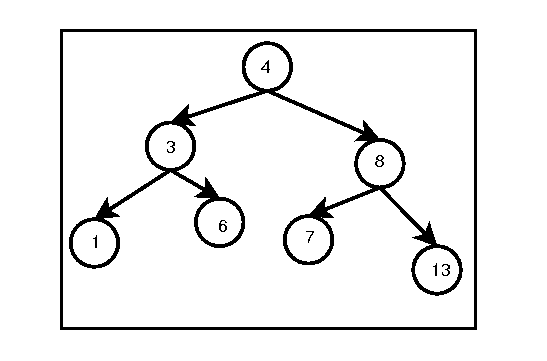

El árbol anterior lo expresaremos como A(4,A(3,A(1),A(6)),A(8,A(7),A(13)))
Es decir, cada subárbol se denotará por A(nodo,Aizq,Ader)

In [38]:
class arbol:
    numero = 0
    
    def __init__(self,nodo,izq=None,der=None):
        
        
        if (izq == None and der != None) or (der == None and izq != None):
            raise Exception("Error, ese árbol no era binario")
        elif izq == None  and der == None:
            self.nodo = nodo
            self.izq = None
            self.der = None
        elif isinstance(izq,arbol) and isinstance(der,arbol) :
            self.nodo = nodo
            self.izq = izq
            self.der = der
        arbol.numero += 1
      
   
            
    def __str__(self):
        if self.izq == None:
            return "A" +"("+ str(self.nodo) + ")"
        else:
             return f"A({self.nodo},{str(self.izq)},{str(self.der)})"
        
    def __repr__(self):
        if self.izq == None:
            return "A" +"("+str(self.nodo)+")"
        else:
            return f"A({self.nodo},{str(self.izq)},{str(self.der)})"
        
    def profundidad(self):
        prof = 0
        if self.izq == None:
            return prof
        else:
            return 1 + max([self.izq.profundidad(),self.der.profundidad()])
    def nodos(self):
        nodos = []
        if self.izq == None:
            return (nodos + [self.nodo])
        else:
             return nodos + [self.nodo] + self.izq.nodos() + self.der.nodos()
            
    @classmethod
    def cantidad(cls):  #cls es la clase
        print(cls.numero)
   
            
    
            

In [40]:
A = arbol(2,arbol(3),arbol(5))
ejemplo =arbol(4, arbol(3,arbol(1),arbol(6)),arbol(8,arbol(7),arbol(13)))
(ejemplo.profundidad())
arbol.cantidad()

20


# Volviendo a los Vehículos

El concesionario del primer ejercicio, gracias a nuestro trabajo, ha podido crecer y ahora no solo vende motos, sino coches, motos, caravanas, aviones...
Entonces ahora nos han vuelto a llamar para poder crear una nueva base de datos.
Crea una clase Vehiculo que será la super clase, teniendo esta los parámetros color, marca, ruedas y tanque. En ellos se definirán los métodos que ya practicamos en el ejercicio 1 (arrancar, rellenar tanque...)
Después crearemos las clases coche y moto1 (el 1 es para evitar problemas con la clase anterior) y aqui el método repr nos deberá devolver que tipo de vehiculo es, esto es, si coche1 es un objeto coche print(coche1) = "Esto es un coche"

In [5]:
class vehiculo:
    def __init__(self,matricula,marca,color, ruedas,tanque= "lleno"):
        self.matricula = matricula
        self.ruedas = ruedas
        self.color = color
        self.marca = marca
        if tanque in ["lleno", "medio","vacio"]:
            self.tanque = tanque
        else: 
            raise Exception("Valor no válido")
            #Ejercicio 2
    def arrancar(self):
            if self.tanque == "medio":
                print("Brum brum")
                self.tanque = "vacio"
            
            elif self.tanque == "lleno": 
                print("Brum brum")
                self.tanque = "medio"
    def repostar(self):
        self.tanque = "lleno"
        return
            
class coche(vehiculo):
    def __init__(self,matricula,marca,color, ruedas,tanque= "lleno"):
        super().__init__(matricula,marca,color, ruedas,tanque= "lleno")
        
    def __repr__(self):
        return f"Esto es un coche, cuya matricula es {self.matricula}"

In [6]:
coche1 = coche("as","toyota","rojo",2)
coche1.arrancar()

Brum brum


In [13]:
def avisador(fun):
    def wrap(*args):
        print(f"se ejecutó {fun}")
        return fun(*args)
    return wrap

@avisador    
def suma(a,b):
    return a+b


